In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
cust=pd.read_csv(r"D:\WORK\ALab\Python\Insurance Claims - Case Study 3\cust_demographics.csv")
claim=pd.read_csv(r"D:\WORK\ALab\Python\Insurance Claims - Case Study 3\claims.csv")

In [3]:
data=pd.merge(left=cust, right=claim, how="inner", left_on=cust.CUST_ID, right_on=claim.customer_id)

In [4]:
data.drop(columns=["key_0","customer_id"], inplace=True)
data.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


## Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [6]:
data.claim_date = pd.to_datetime(data.claim_date, format="%m/%d/%Y")
data.DateOfBirth=pd.to_datetime(data.DateOfBirth, format="%d-%b-%y")
data.total_policy_claims = data.total_policy_claims.astype("object")

## Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [7]:
data.claim_amount = data.claim_amount.str.replace("$","").astype("float")

C:\Users\SANDEEP RAWAT\AppData\Local\Temp\ipykernel_28844\4102203368.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.claim_amount = data.claim_amount.str.replace("$","").astype("float")


## Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [8]:
data["unreported_claims"] = np.where(data.police_report.isin(["No","Unknown"]),0,1)
data.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0


## Q5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [9]:
data = data.drop_duplicates(subset="CUST_ID", keep="last")
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,0
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


## Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [10]:
data.claim_amount = data.claim_amount.fillna(data.claim_amount.mean())

In [11]:
data.total_policy_claims = data.total_policy_claims.fillna(data.total_policy_claims.mode())

## Q7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18 
Youth 18-30
Adult 30-60
Senior > 60

In [12]:
data["age"] = pd.Timestamp.now().year - data.DateOfBirth.dt.year
data.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims,age
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,45
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,54
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,40
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,0,38
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0,47


In [13]:
bins=[0,18,30,60,np.inf]
labels=["Children", "Youth", "Adult", "Senior"]
data["category"] = pd.cut(data.age, bins=bins, labels=labels)    
data.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims,age,category
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,45,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,54,Adult
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,40,Adult
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,0,38,Adult
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0,47,Adult


## Q8. What is the average amount claimed by the customers from various segments?

In [14]:
data.groupby("Segment").claim_amount.mean()

Segment
Gold        12846.386178
Platinum    12371.644999
Silver      12267.146560
Name: claim_amount, dtype: float64

## Q9.  What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [15]:
data[data.claim_date <= (pd.to_datetime("01-10-2018",format="%d-%m-%Y") + pd.DateOffset(days=-20))].groupby("incident_cause").claim_amount.sum()

incident_cause
Crime                 7.219374e+05
Driver error          3.315848e+06
Natural causes        1.312745e+06
Other causes          3.723147e+06
Other driver error    3.277533e+06
Name: claim_amount, dtype: float64

## How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [16]:
data[(data.State.isin(["TX","DE","AK"])) & (data.incident_cause.isin(['Driver error','Other driver error'])) & (data.age>18)].shape[0]

28

## Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [17]:
df=data.groupby(["gender","Segment"]).claim_amount.sum().reset_index().pivot(index="Segment", columns="gender", values="claim_amount")

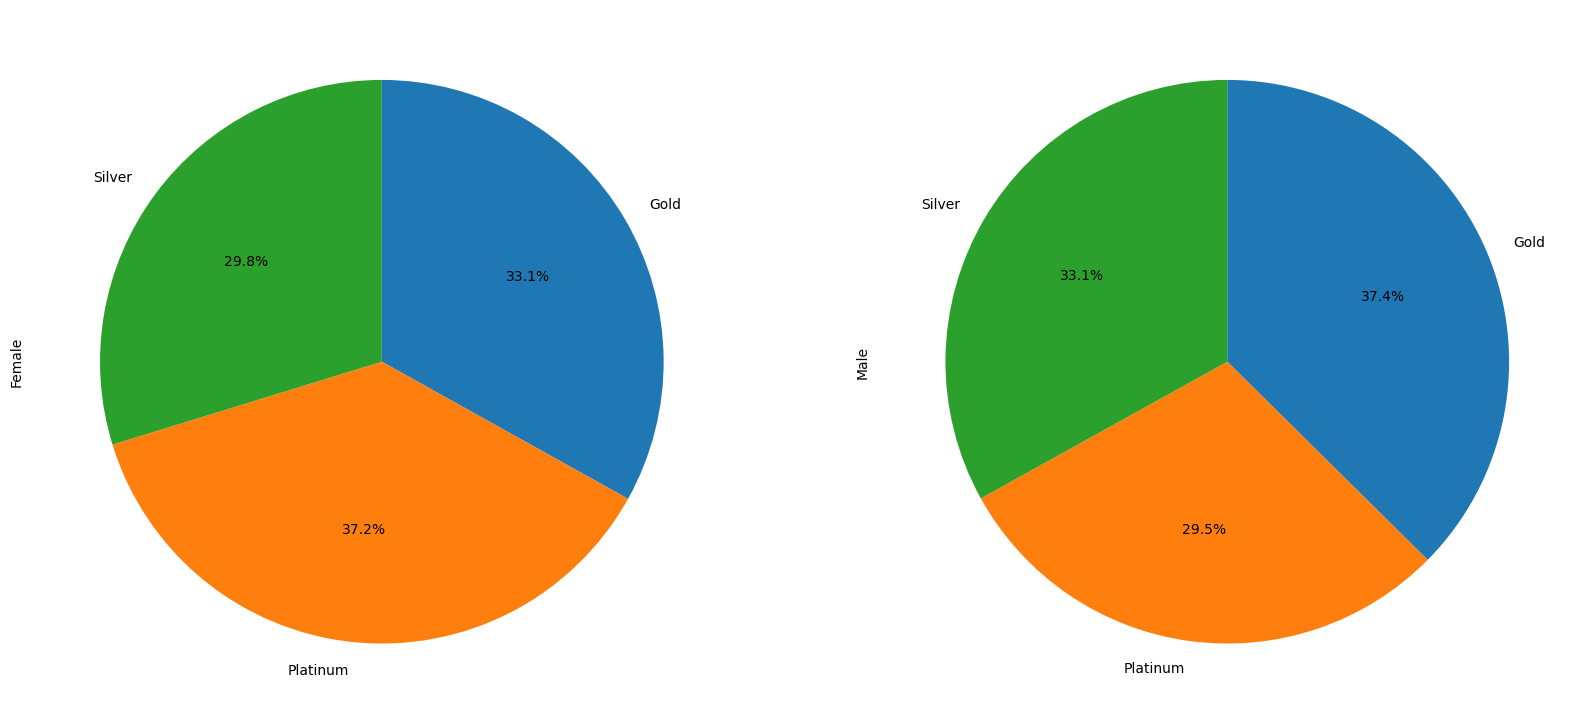

In [18]:
df.plot(kind="pie", subplots=True, legend=False, figsize=(20,10), counterclock=False, startangle=-270, autopct="%.1f%%")
plt.show()

##  Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

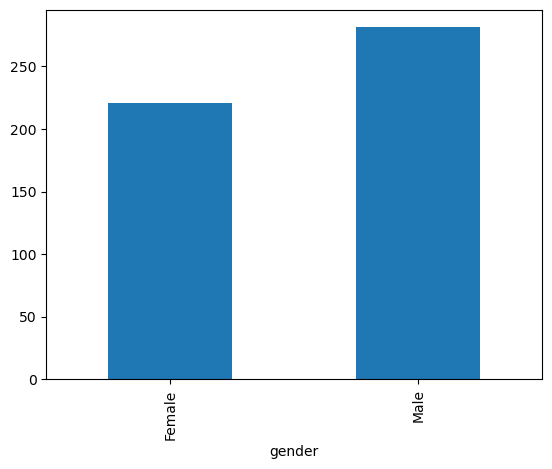

In [19]:
data[data.incident_cause.isin(['Driver error','Other driver error'])].groupby("gender").claim_amount.count().plot(kind="bar")
plt.show()

## Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

<Axes: xlabel='category'>

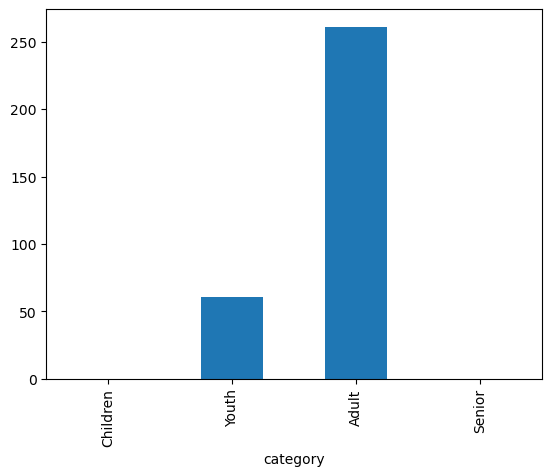

In [20]:
data[data.fraudulent=="Yes"].groupby("category").total_policy_claims.sum().plot(kind="bar")

##  Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.  

In [21]:
age = data.groupby(data.claim_date.dt.strftime("%b")).claim_amount.sum().reset_index()
age["claim_date"] = pd.Categorical(age["claim_date"], categories=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], ordered=True)

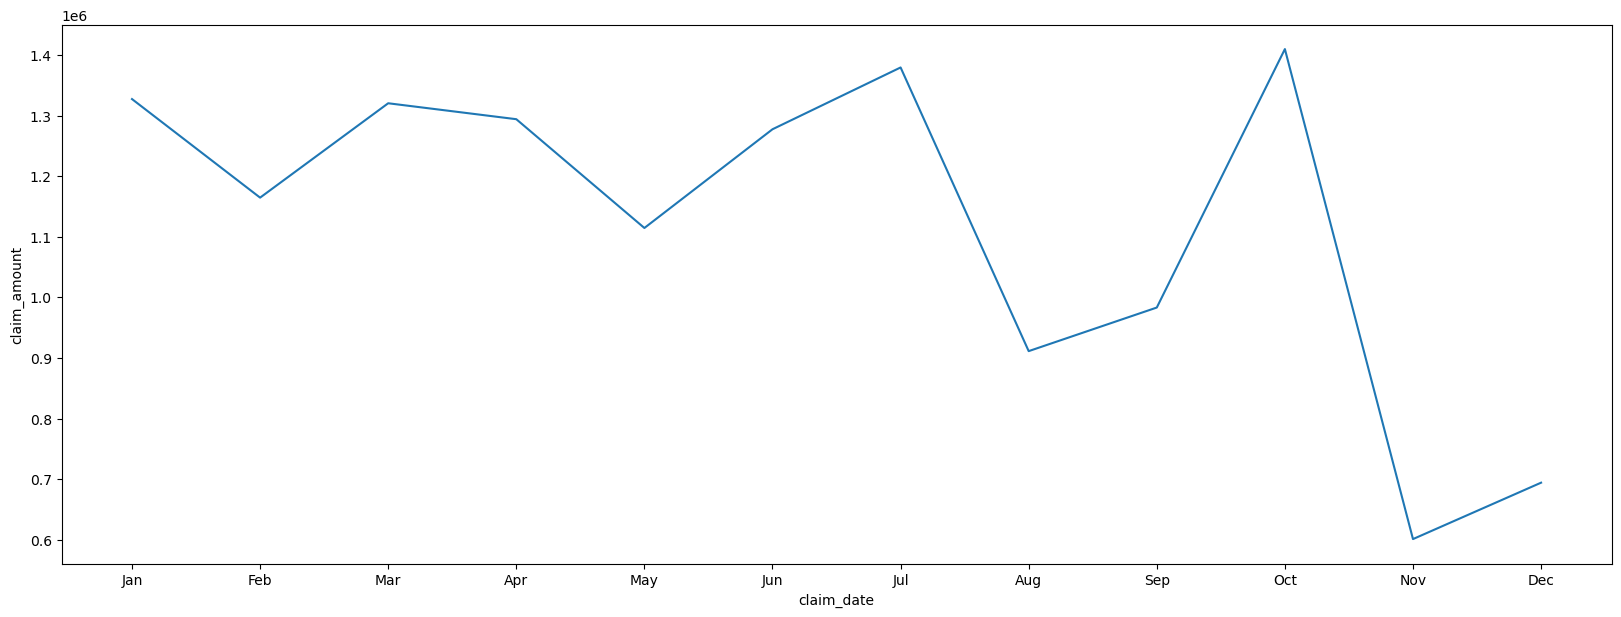

In [22]:
plt.figure(figsize=(20,7))
sns.lineplot(data=age, x="claim_date",y="claim_amount")
plt.show()

## What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [30]:
avg_claim_amount

,gender,category,fraudulent,claim_amount
0,Female,Children,No,NaN
1,Female,Children,Yes,NaN
2,Female,Youth,No,13149.624543
3,Female,Youth,Yes,10144.561204
4,Female,Adult,No,12226.465152
5,Female,Adult,Yes,13572.593474
6,Female,Senior,No,NaN
7,Female,Senior,Yes,NaN
8,Male,Children,No,NaN
9,Male,Children,Yes,NaN


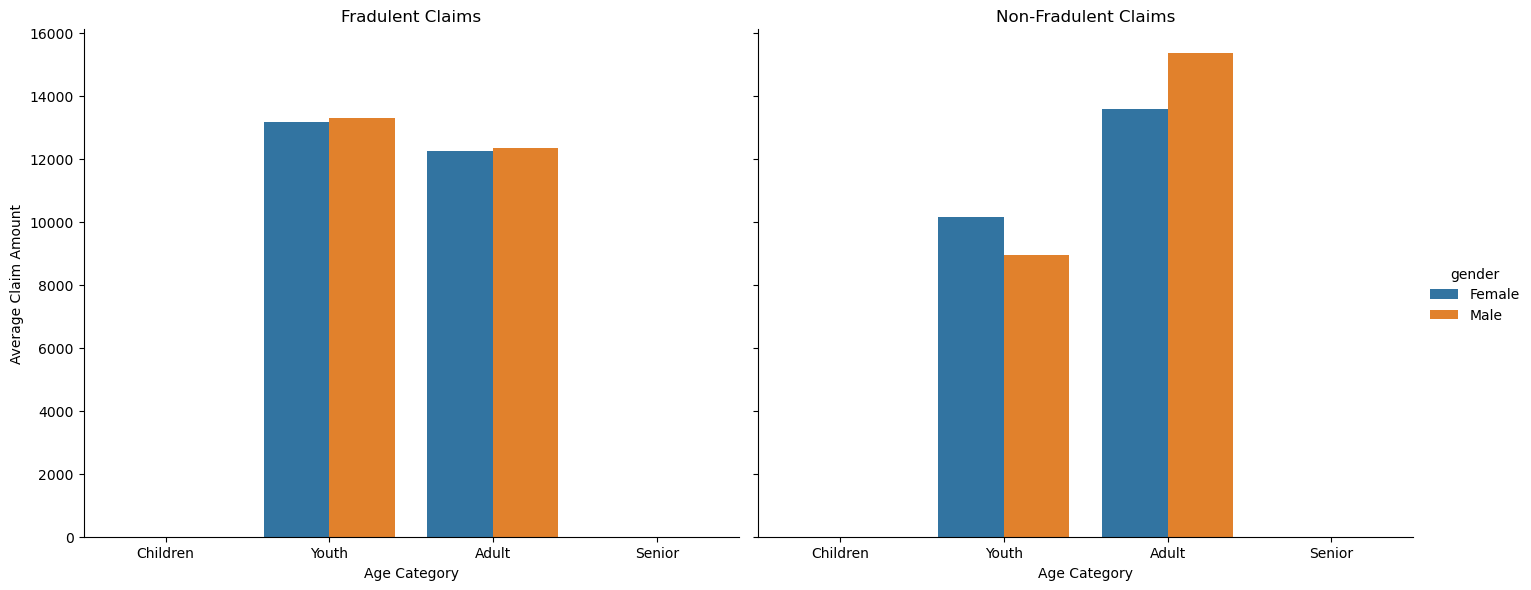

In [23]:
avg_claim_amount = data.groupby(['gender', 'category', 'fraudulent'])['claim_amount'].mean().reset_index()


ax=sns.catplot(x='category', y='claim_amount', hue='gender', col='fraudulent', data=avg_claim_amount, kind='bar', height=6, aspect=1.2)

ax.axes[0,0].set_title("Fradulent Claims")
ax.axes[0,1].set_title("Non-Fradulent Claims")
ax.set_axis_labels("Age Category", "Average Claim Amount")

plt.show()

In [24]:
# fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

# data[data.fraudulent=="Yes"].groupby(["gender","category"]).claim_amount.mean().reset_index().pivot(index="category", columns="gender", values="claim_amount").plot(kind="bar",stacked=True, ax=ax1)
# ax1.set_title("Fradulent Claims")
# data[data.fraudulent=="No"].groupby(["gender","category"]).claim_amount.mean().reset_index().pivot(index="category", columns="gender", values="claim_amount").plot(kind="bar",stacked=True, ax=ax2)
# ax2.set_title("Non-Fradulent Claims")

# plt.show()

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

##  Is there any similarity in the amount claimed by males and females?

#### *Defining the hypothesis*
#### H0: mean(amount_claimed by Males) = mean(amount_claimed by Females)
#### H1: mean(amount_claimed by Males) != mean(amount_claimed by Females)
    
#### *Setting the Confidence Interval*
#### CI = 95%
#### p value = 0.05


In [25]:
stats.ttest_ind(data.claim_amount[data.gender=="Male"], data.claim_amount[data.gender=="Female"])

Ttest_indResult(statistic=0.9630529881732579, pvalue=0.3357373087404283)

* **Business Conclusion:** Since the p-value is high, we will accept the Null Hypothesis,i.e, in the sample provided, there is not much difference between the mean values of Amount Claimed by Male and Female customers.

## Is there any relationship between age category and segment?

#### *Defining the hypothesis*
#### H0: There is NO relationship between Age Category and Segment
#### H1: There is A relationship between Age Category and Segment   
#### *Setting the Confidence Interval*
#### CI = 95%
#### p value = 0.05

In [26]:
stats.chi2_contingency(pd.crosstab(index=data.category, columns=data.Segment))

Chi2ContingencyResult(statistic=0.7593686914960874, pvalue=0.6840773070466647, dof=2, expected_freq=array([[ 60.57623049,  58.06962785,  55.35414166],
       [229.42376951, 219.93037215, 209.64585834]]))

* **Busniess Conclusion:** Since the p-value is high enough, we will acceptthe Null Hypothesis, i.e, There is NO relation between the age category and segment in this data provided. 

## The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

#### *Defining the hypothesis*
#### H0: mean(claim amounts) <= 10,000
#### H1: mean(claim amounts) > 10,000
#### *Setting the Confidence Interval*
#### CI = 95%
#### p value = 0.05

In [27]:
stats.ttest_1samp(data.claim_amount, 10000)

TtestResult(statistic=6.146231134929638, pvalue=1.1156022878717526e-09, df=1077)

* **Busniess Conclusion:** Since the p-value is low enough, we will reject the Null Hypothesis, i.e, the average of claim amounts this year is not less than $10,000. 

## Is there any difference between age groups and insurance claims?

#### *Defining the hypothesis*
#### H0: No difference between age groups and insurance claims
#### H1: Difference between age groups and insurance claims
#### *Setting the Confidence Interval*
#### CI = 95%
#### p value = 0.05

In [28]:
stats.f_oneway(data.total_policy_claims[data.category=="Youth"],data.total_policy_claims[data.category=="Adult"])

F_onewayResult(statistic=nan, pvalue=nan)

* **Busniess Conclusion:** Since the p-value is high enough, we will accept the Null Hypothesis, i.e, there is NO difference between age groups and insurance claims.

## Is there any relationship between total number of policy claims and the claimed amount?

In [29]:
data.total_policy_claims.corr(other= data.claim_amount)

-0.022019937854152783

* *Business Conclusion:* Since the correlation coefficient is negative the number of policy claims in inversely propotional to the claimed amount.